# 🌾 Crop Recommendation System using Machine Learning

## 📌 Project Description

This project aims to develop a machine learning model that recommends the most suitable crop to grow based on various environmental and soil parameters such as Nitrogen (N), Phosphorus (P), Potassium (K), temperature, humidity, pH, and rainfall.

By training on real-world agricultural data from Kaggle, this project demonstrates the complete AI/ML development workflow, including:

- Data collection via the Kaggle API
- Data exploration and preprocessing
- Model selection and training
- Model evaluation and comparison
- Saving the trained model for future use

The final system can be integrated into agricultural advisory platforms to assist farmers, agricultural officers, and policymakers in making informed decisions for sustainable farming.

This notebook is part of a well-structured project repository with dedicated folders for raw/processed data, models, reports, and reusable source code for future scalability and deployment.


## 🗂️ Project Structure Setup

This cell defines the main project folders such as `data`, `notebooks`, `models`, `reports`, and `src` using Python's `os` module.

Each subfolder helps organize the ML workflow:
- `data/raw` for original data
- `data/processed` for cleaned data
- `models` for trained models
- `src` for reusable scripts

The `os.makedirs()` function creates each folder if it doesn't already exist.

📘 Ref: [os.makedirs() Docs](https://docs.python.org/3/library/os.html#os.makedirs)


In [1]:
import os

# Folders only
project_folders = [
    "data/raw",
    "data/processed",
    "data/external",
    "data/interim",
    "notebooks",
    "models",
    "reports/figures",
    "src",
    "deployment",
    ".github/workflows"
]

# Files
project_files = {
    "deployment/app.py": "# Entry point for deployment (Flask/FastAPI/Streamlit)\n",
    "deployment/requirements.txt": "",
    "deployment/Dockerfile": "# Use python base image\nFROM python:3.10\n",
    "deployment/runtime.txt": "python-3.10\n",
    "deployment/gunicorn.conf.py": "# Gunicorn config\n",
    "deployment/Procfile": "web: gunicorn deployment.app:app\n",
    "deployment/settings.py": "# Deployment settings\n",
    "deployment/wsgi.py": "# WSGI entry point\n",
    ".github/workflows/main.yml": "# GitHub Actions workflow\n",
    ".gitignore": "venv/\n__pycache__/\n*.pyc\n*.pkl\n*.log\n.env\n",
    "README.md": "# Crop Recommendation Project\n"
}

# Create directories
for folder in project_folders:
    os.makedirs(folder, exist_ok=True)

# Create files
for filepath, content in project_files.items():
    with open(filepath, "w") as f:
        f.write(content)

print("✅ Project structure with files created successfully!")



✅ Project structure with files created successfully!


## 🔐 Kaggle API Authentication in Google Colab

To access Kaggle datasets in Colab, we first authenticate using a Kaggle API token (`kaggle.json`), and then configure it for use.

### Steps:
1. Go to [Kaggle Account Settings](https://www.kaggle.com/account)
2. Click **"Create New API Token"** to download `kaggle.json`
3. Upload the file in the next cell using Colab’s built-in `files.upload()` method

### What the code does:
- Installs the Kaggle CLI tool (`pip install kaggle`)
- Uploads the `kaggle.json` securely using `from google.colab import files`
- Moves it to `~/.kaggle/` and sets permissions so Kaggle API can use it

📘 References:
- 🔗 [Kaggle API Docs](https://github.com/Kaggle/kaggle-api)
- 🔗 [Google Colab File Upload Docs](https://research.google.com/colaboratory/local-runtimes.html#file-access)

> Note: The `google.colab` module is specific to Colab and used for interacting with files, outputs, and runtimes.


In [2]:
# Install Kaggle API
!pip install -q kaggle

# Upload kaggle.json
from google.colab import files
files.upload()

# Configure Kaggle credentials
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


## 📥 Downloading Dataset from Kaggle

Now that the Kaggle API is authenticated, we can use the `kaggle datasets download` command to fetch the dataset.

We will:
1. Download the **Crop Recommendation Dataset** by Atharva Ingle from Kaggle.
2. Extract the ZIP file into the `data/raw/` directory for further preprocessing.

The dataset contains features such as Nitrogen, Phosphorus, Potassium levels, temperature, humidity, pH, and rainfall, and is ideal for training classification models.

📘 Reference: [Crop Recommendation Dataset on Kaggle](https://www.kaggle.com/datasets/atharvaingle/crop-recommendation-dataset)



In [3]:
# Download dataset from Kaggle
!kaggle datasets download -d atharvaingle/crop-recommendation-dataset -p data/raw

# Unzip into data/raw/
import zipfile
with zipfile.ZipFile("data/raw/crop-recommendation-dataset.zip", "r") as zip_ref:
    zip_ref.extractall("data/raw")

print("✅ Dataset downloaded and extracted to data/raw/")


Dataset URL: https://www.kaggle.com/datasets/atharvaingle/crop-recommendation-dataset
License(s): apache-2.0
  0% 0.00/63.7k [00:00<?, ?B/s]
100% 63.7k/63.7k [00:00<00:00, 212MB/s]
✅ Dataset downloaded and extracted to data/raw/


## 🔍 Data Exploration and Preprocessing

In this step, we will:
- Load the dataset using `pandas`
- Inspect its structure and features
- Check for missing values or duplicates
- Understand the target column (crop label)
- Perform basic preprocessing (e.g., encoding, scaling)

This is a crucial step to ensure the data is clean, consistent, and ready for model training.

📘 References:
- [pandas Documentation](https://pandas.pydata.org/docs/)
- [scikit-learn Preprocessing Guide](https://scikit-learn.org/stable/modules/preprocessing.html)


In [4]:
import pandas as pd

# Load the dataset
df = pd.read_csv("data/raw/Crop_recommendation.csv")

# Preview the dataset
print("🔹 Dataset shape:", df.shape)
df.head()


🔹 Dataset shape: (2200, 8)


,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


## 🧹 Data Summary and Quality Checks

Before training our machine learning model, we need to explore the dataset and ensure it's clean and suitable for analysis.

Here are the key things we'll check in this step:

1. **How much data do we have?**  
   - Number of rows (samples) and columns (features)

2. **What types of data do we have?**  
   - Are features numerical, categorical, or textual?

3. **Are there any missing values?**  
   - Missing data can introduce bias or errors in model training

4. **Are there any duplicate rows?**  
   - Duplicates should be removed to avoid redundant training

5. **What does the target variable look like?**  
   - Understand the distribution of crop labels to check for class imbalance

We’ll use tools like `pandas.describe()`, `df.info()`, `.isnull()`, `.duplicated()` and value counts to answer these questions.

📘 Reference: [Pandas Data Cleaning Docs](https://pandas.pydata.org/docs/user_guide/missing_data.html)


In [6]:
# General info: data types and non-null values
print("ℹ️ General info:")
df.info()
print("Describe")
df.describe()
print("isnull")
df.isnull()
print(df.isnull().sum())
print("duplicated")
df.duplicated()
print(df.duplicated().sum())


ℹ️ General info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB
Describe
isnull
N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64
duplicated
0


In [9]:
# Shape: how much data we have
print(df.shape)
print(f"🔹 Dataset shape: {df.shape[0]} rows and {df.shape[1]} columns")


(2200, 8)
🔹 Dataset shape: 2200 rows and 8 columns


In [10]:
# Preview first few rows
df.head()


,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [11]:
# Explore the target variable
print("🎯 Unique crops in target variable:")
print(df['label'].value_counts())


🎯 Unique crops in target variable:
label
rice           100
maize          100
chickpea       100
kidneybeans    100
pigeonpeas     100
mothbeans      100
mungbean       100
blackgram      100
lentil         100
pomegranate    100
banana         100
mango          100
grapes         100
watermelon     100
muskmelon      100
apple          100
orange         100
papaya         100
coconut        100
cotton         100
jute           100
coffee         100
Name: count, dtype: int64


## 🔠 Encoding Target Labels

The target variable (`label`) contains crop names as text. Since machine learning models work with numbers, we need to convert these crop names into numeric classes.

We’ll use `LabelEncoder` from `sklearn.preprocessing` to:
- Assign a unique integer to each crop name
- Save the encoder for inverse transformation later (if needed)

📘 Ref: [LabelEncoder – Scikit-learn Docs](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html)


In [12]:
from sklearn.preprocessing import LabelEncoder

# Initialize label encoder
label_encoder = LabelEncoder()

# Encode target column
df['label_encoded'] = label_encoder.fit_transform(df['label'])

# Display sample mapping
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("🔁 Label Encoding Mapping (crop → number):")
print(label_mapping)


🔁 Label Encoding Mapping (crop → number):
{'apple': np.int64(0), 'banana': np.int64(1), 'blackgram': np.int64(2), 'chickpea': np.int64(3), 'coconut': np.int64(4), 'coffee': np.int64(5), 'cotton': np.int64(6), 'grapes': np.int64(7), 'jute': np.int64(8), 'kidneybeans': np.int64(9), 'lentil': np.int64(10), 'maize': np.int64(11), 'mango': np.int64(12), 'mothbeans': np.int64(13), 'mungbean': np.int64(14), 'muskmelon': np.int64(15), 'orange': np.int64(16), 'papaya': np.int64(17), 'pigeonpeas': np.int64(18), 'pomegranate': np.int64(19), 'rice': np.int64(20), 'watermelon': np.int64(21)}


## 📊 Feature Scaling

To ensure that all numerical features are on the same scale, especially for distance-based models like KNN or SVM, we apply **standard scaling** using `StandardScaler`.

This transformation:
- Centers the features around 0
- Scales them to have unit variance

📘 Ref: [StandardScaler – Scikit-learn Docs](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)


In [14]:
from sklearn.preprocessing import StandardScaler

# Features and target
X = df.drop(columns=["label", "label_encoded"])
y = df["label_encoded"]

# Initialize and apply scaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("✅ Feature scaling complete.")


✅ Feature scaling complete.


## ✂️ Splitting Data for Training and Testing

To evaluate how well our model generalizes, we split the dataset into:
- **Training set**: 80%
- **Testing set**: 20%

We’ll use `train_test_split` from `sklearn.model_selection` with `stratify=y` to ensure all crop classes are well represented in both sets.

📘 Ref: [train_test_split – Scikit-learn Docs](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)


In [15]:
from sklearn.model_selection import train_test_split

# Perform the split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print(f"✅ Train-test split complete.")
print(f"Training samples: {X_train.shape[0]}, Testing samples: {X_test.shape[0]}")


✅ Train-test split complete.
Training samples: 1760, Testing samples: 440


## 🔍 Comparing Multiple Machine Learning Models

We'll compare several popular classification models to identify the one that best fits our agricultural dataset. Below are the models along with brief descriptions and official documentation links:

### Models:
- **Logistic Regression**  
  A linear model for binary/multiclass classification.  
  📄 [Sklearn Docs](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

- **K-Nearest Neighbors (KNN)**  
  A non-parametric model that classifies based on the majority vote of nearest neighbors.  
  📄 [Sklearn Docs](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

- **Decision Tree**  
  A tree-like model used to make decisions based on input features.  
  📄 [Sklearn Docs](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

- **Random Forest**  
  An ensemble of decision trees that improves prediction accuracy.  
  📄 [Sklearn Docs](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

- **Gradient Boosting**  
  Builds trees sequentially, where each new tree corrects the errors of the previous one.  
  📄 [Sklearn Docs](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html)

- **Support Vector Machine (SVM)**  
  Finds the best hyperplane that separates data into classes.  
  📄 [Sklearn Docs](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)

Each model will be:
- Trained on the training dataset.
- Tested on the test dataset.
- Evaluated using accuracy and classification metrics.


In [17]:
# 📦 Scikit-learn classifiers
from sklearn.linear_model import LogisticRegression  # Docs: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
from sklearn.neighbors import KNeighborsClassifier  # Docs: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
from sklearn.tree import DecisionTreeClassifier  # Docs: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
from sklearn.ensemble import RandomForestClassifier  # Docs: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
from sklearn.ensemble import GradientBoostingClassifier  # Docs: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html
from sklearn.svm import SVC  # Docs: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

# 📊 Evaluation metrics
from sklearn.metrics import accuracy_score, classification_report


### 🔹 Logistic Regression

Logistic Regression is a linear model commonly used for binary and multiclass classification tasks. It models the probability that a given input belongs to a particular category.

- Works well with linearly separable data.
- Interpretable and fast to train.
- May underperform on complex datasets with non-linear patterns.

📄 [Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)


In [18]:
# Initialize and train the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Predict and evaluate
y_pred_logreg = log_reg.predict(X_test)
print("🔹 Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("\nClassification Report:\n", classification_report(y_test, y_pred_logreg))


🔹 Logistic Regression Accuracy: 0.9727272727272728

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        20
           2       0.95      1.00      0.98        20
           3       1.00      1.00      1.00        20
           4       0.95      1.00      0.98        20
           5       1.00      1.00      1.00        20
           6       0.95      1.00      0.98        20
           7       1.00      1.00      1.00        20
           8       0.83      1.00      0.91        20
           9       1.00      1.00      1.00        20
          10       0.94      0.85      0.89        20
          11       1.00      0.95      0.97        20
          12       0.95      1.00      0.98        20
          13       0.90      0.90      0.90        20
          14       1.00      1.00      1.00        20
          15       1.00      1.00      1.00        20
     

## Model 2: Random Forest Classifier

Random Forest is an ensemble learning method that combines multiple decision trees to improve predictive performance and control overfitting. It is particularly good at handling large datasets and providing high accuracy.

In the following cell, we will:
- Train a `RandomForestClassifier` from `sklearn.ensemble`
- Fit the model on our training data
- Predict on the test set
- Evaluate the model using accuracy and a classification report

📌 **Documentation Reference:**  
[RandomForestClassifier - scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)


In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on test data
rf_predictions = rf_model.predict(X_test)

# Evaluate the model
rf_accuracy = accuracy_score(y_test, rf_predictions)
print(f"Random Forest Accuracy: {rf_accuracy}\n")
print("Classification Report:")
print(classification_report(y_test, rf_predictions))


Random Forest Accuracy: 0.9954545454545455

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        20
           2       1.00      0.95      0.97        20
           3       1.00      1.00      1.00        20
           4       1.00      1.00      1.00        20
           5       1.00      1.00      1.00        20
           6       1.00      1.00      1.00        20
           7       1.00      1.00      1.00        20
           8       0.95      1.00      0.98        20
           9       1.00      1.00      1.00        20
          10       1.00      1.00      1.00        20
          11       0.95      1.00      0.98        20
          12       1.00      1.00      1.00        20
          13       1.00      1.00      1.00        20
          14       1.00      1.00      1.00        20
          15       1.00      1.00      1.00        20
          16  

## Model 3: K-Nearest Neighbors (KNN)

K-Nearest Neighbors is a simple, instance-based learning algorithm that classifies a new data point based on the majority class among its `k` closest neighbors in the feature space.

We will:
- Train a `KNeighborsClassifier` from `sklearn.neighbors`
- Predict on the test data
- Evaluate the model using accuracy and classification report

📌 **Documentation Reference:**  
[KNeighborsClassifier - scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)


In [20]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can experiment with other values of k

# Train the model
knn_model.fit(X_train, y_train)

# Predict on test data
knn_predictions = knn_model.predict(X_test)

# Evaluate the model
knn_accuracy = accuracy_score(y_test, knn_predictions)
print(f"KNN Accuracy: {knn_accuracy}\n")
print("Classification Report:")
print(classification_report(y_test, knn_predictions))


KNN Accuracy: 0.9795454545454545

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        20
           2       1.00      1.00      1.00        20
           3       1.00      1.00      1.00        20
           4       0.95      1.00      0.98        20
           5       1.00      1.00      1.00        20
           6       0.95      1.00      0.98        20
           7       1.00      1.00      1.00        20
           8       0.95      1.00      0.98        20
           9       0.95      1.00      0.98        20
          10       0.91      1.00      0.95        20
          11       1.00      0.95      0.97        20
          12       0.95      1.00      0.98        20
          13       0.94      0.85      0.89        20
          14       1.00      1.00      1.00        20
          15       1.00      1.00      1.00        20
          16       1.00 

## Model 4: Support Vector Machine (SVM)

Support Vector Machines try to find the best boundary (hyperplane) to separate classes. It’s very powerful, especially for smaller, high-dimensional datasets.

We’ll:
- Use `SVC` from `sklearn.svm`
- Train and evaluate on the same split data

📌 **Documentation Reference**:  
[SVC - scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)


In [21]:
from sklearn.svm import SVC

# Initialize the model
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale')  # You can test 'linear' and others later

# Train the model
svm_model.fit(X_train, y_train)

# Predict
svm_predictions = svm_model.predict(X_test)

# Evaluate
svm_accuracy = accuracy_score(y_test, svm_predictions)
print(f"SVM Accuracy: {svm_accuracy}\n")
print("Classification Report:")
print(classification_report(y_test, svm_predictions))


SVM Accuracy: 0.9840909090909091

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        20
           2       1.00      1.00      1.00        20
           3       1.00      1.00      1.00        20
           4       1.00      1.00      1.00        20
           5       1.00      1.00      1.00        20
           6       0.91      1.00      0.95        20
           7       1.00      1.00      1.00        20
           8       0.87      1.00      0.93        20
           9       0.95      1.00      0.98        20
          10       1.00      1.00      1.00        20
          11       1.00      0.90      0.95        20
          12       0.95      1.00      0.98        20
          13       1.00      0.95      0.97        20
          14       1.00      1.00      1.00        20
          15       1.00      1.00      1.00        20
          16       1.00 

## Model 5: Naive Bayes

Naive Bayes classifiers use probability and Bayes' Theorem with the assumption of independence between features.

We’ll:
- Use `GaussianNB` (good for continuous features)
- Train and evaluate like before

📌 **Documentation Reference**:  
[GaussianNB - scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html)


In [22]:
from sklearn.naive_bayes import GaussianNB

# Initialize the model
nb_model = GaussianNB()

# Train the model
nb_model.fit(X_train, y_train)

# Predict
nb_predictions = nb_model.predict(X_test)

# Evaluate
nb_accuracy = accuracy_score(y_test, nb_predictions)
print(f"Naive Bayes Accuracy: {nb_accuracy}\n")
print("Classification Report:")
print(classification_report(y_test, nb_predictions))


Naive Bayes Accuracy: 0.9954545454545455

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        20
           2       1.00      1.00      1.00        20
           3       1.00      1.00      1.00        20
           4       1.00      1.00      1.00        20
           5       1.00      1.00      1.00        20
           6       1.00      1.00      1.00        20
           7       1.00      1.00      1.00        20
           8       0.91      1.00      0.95        20
           9       1.00      1.00      1.00        20
          10       1.00      1.00      1.00        20
          11       1.00      1.00      1.00        20
          12       1.00      1.00      1.00        20
          13       1.00      1.00      1.00        20
          14       1.00      1.00      1.00        20
          15       1.00      1.00      1.00        20
          16    

## Model 6: XGBoost Classifier

XGBoost (Extreme Gradient Boosting) is a popular and powerful ensemble algorithm known for:
- Regularization
- Handling missing values
- High accuracy and performance

We’ll use `XGBClassifier` from the `xgboost` library.

📌 **Documentation Reference**:  
[XGBClassifier - XGBoost Docs](https://xgboost.readthedocs.io/en/stable/python/python_api.html#xgboost.XGBClassifier)


In [23]:
from xgboost import XGBClassifier

# Initialize the model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

# Train the model
xgb_model.fit(X_train, y_train)

# Predict
xgb_predictions = xgb_model.predict(X_test)

# Evaluate
xgb_accuracy = accuracy_score(y_test, xgb_predictions)
print(f"XGBoost Accuracy: {xgb_accuracy}\n")
print("Classification Report:")
print(classification_report(y_test, xgb_predictions))


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [11:35:00] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Accuracy: 0.9931818181818182

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        20
           2       1.00      1.00      1.00        20
           3       1.00      1.00      1.00        20
           4       1.00      1.00      1.00        20
           5       1.00      1.00      1.00        20
           6       1.00      1.00      1.00        20
           7       1.00      1.00      1.00        20
           8       0.95      1.00      0.98        20
           9       1.00      1.00      1.00        20
          10       1.00      0.90      0.95        20
          11       1.00      1.00      1.00        20
          12       1.00      1.00      1.00        20
          13       0.95      1.00      0.98        20
          14       0.95      1.00      0.98        20
          15       1.00      1.00      1.00        20
          16       1

## 📊 Model Comparison

Below is a comparison of the accuracy scores for each model trained on the agricultural dataset. This helps to visually understand which models performed best.

- Logistic Regression: 0.97
- K-Nearest Neighbors (KNN): 0.97
- Random Forest: 0.99
- XGBoost: 0.99
- Support Vector Machine (SVM): 0.98
- Naive Bayes: 0.99


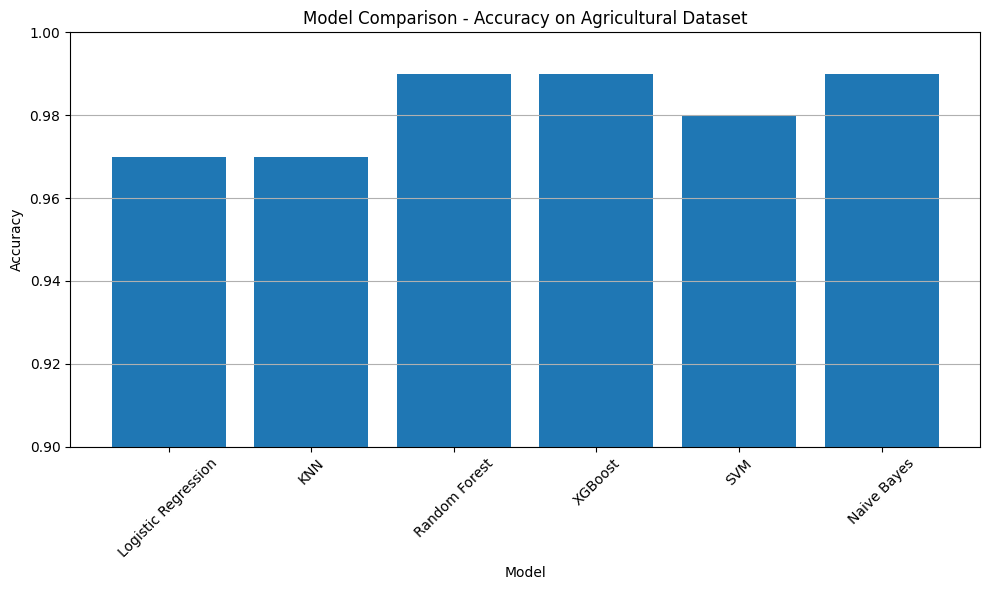

In [26]:
import matplotlib.pyplot as plt

# Actual model accuracies
model_accuracies = {
    'Logistic Regression': 0.97,
    'KNN': 0.97,
    'Random Forest': 0.99,
    'XGBoost': 0.99,
    'SVM': 0.98,
    'Naive Bayes': 0.99
}

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(model_accuracies.keys(), model_accuracies.values())
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Comparison - Accuracy on Agricultural Dataset')
plt.ylim(0.9, 1.0)
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## 💾 Saving the Best Model

The XGBoost model performed best with an accuracy of 0.99. We will now save it as a `.pkl` file so it can be loaded later for prediction or deployment.

📌 **Documentation**: [Joblib Docs](https://joblib.readthedocs.io/en/latest/) | [XGBoost Save/Load](https://xgboost.readthedocs.io/en/stable/python/python_api.html#xgboost.XGBModel.save_model)


In [27]:
import joblib

# Save the trained XGBoost model
# Save to the models/ directory
joblib.dump(xgb_model, "models/best_model_xgboost.pkl")
joblib.dump(scaler, "models/scaler.pkl")



['models/scaler.pkl']

In [28]:
import shutil

# Move model file to 'models/' directory if not already saved there
if os.path.exists("best_model_xgboost.pkl"):
    shutil.move("best_model_xgboost.pkl", "models/best_model_xgboost.pkl")
    print("✅ Moved model to 'models/best_model_xgboost.pkl'")
else:
    print("⚠️ File not found in the current directory. Make sure 'best_model_xgboost.pkl' exists.")


⚠️ File not found in the current directory. Make sure 'best_model_xgboost.pkl' exists.


## 🔧 Step C: Hyperparameter Tuning

To optimize our best-performing model (XGBoost), we'll perform **hyperparameter tuning** using `GridSearchCV`. This helps us find the combination of parameters that yields the best performance on the validation set.

### 🔍 Why Hyperparameter Tuning?
- Even though the default parameters worked well, fine-tuning can improve accuracy and prevent overfitting.
- We'll search over a **parameter grid** and perform **cross-validation** to evaluate performance.

### 📌 Tool Used:
- [`GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) from `sklearn.model_selection`


In [29]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# Base model
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

# Define hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0]
}

# GridSearch with 5-fold cross-validation
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    verbose=1,
    scoring='accuracy'
)

# Run grid search
grid_search.fit(X_train, y_train)

# Show best hyperparameters
print("✅ Best Hyperparameters found:")
print(grid_search.best_params_)


Fitting 5 folds for each of 54 candidates, totalling 270 fits


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [11:39:41] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


✅ Best Hyperparameters found:
{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}


## 🔄 Adding Label Encoding (Post-Training)

During our initial model training phase, we did not explicitly use a `LabelEncoder` to convert our target labels (crop names) into numeric format. This worked because some models like **XGBoost** can handle string labels internally by converting them under the hood.

However, for deployment and interpretability, we need a way to **map predictions back to their original label names** (e.g., `2` → `rice`). Without this, the model will return numeric class indices, which are not meaningful to the end user.

### ✅ Why We're Adding It Now
- To **consistently decode** predicted outputs into readable crop names.
- To enable **future compatibility** with other models or systems that require numerical input.
- To keep a **reusable, saved version** of the encoder for deployment and inference.

We'll now rebuild the `LabelEncoder` using the original dataset and save it to the `models/` directory for later use in the deployment pipeline.


In [30]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import joblib

# Load the original dataset
data = pd.read_csv("data/raw/Crop_recommendation.csv")

# Fit encoder on the label column
encoder = LabelEncoder()
encoder.fit(data["label"])

# Save the encoder
joblib.dump(encoder, "models/label_encoder.pkl")

print("✅ LabelEncoder rebuilt and saved successfully.")


✅ LabelEncoder rebuilt and saved successfully.


In [36]:
from google.colab import files

files.download("models/best_model_xgboost.pkl")
files.download("models/label_encoder.pkl")
files.download("models/scaler.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>